In [105]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import os 

In [107]:
# Loading the final dataset with the selected features
df_final = pd.read_csv('DATA/final_dataset.csv')
df_final.head()

,oldpeak,thalch,ca,age,chol,trestbps,thal_reversable defect,exang_True,cp_atypical angina,sex_Male,thal_normal,cp_non-anginal,target
0,1.069475,0.029124,-0.718306,0.940446,-0.262867,0.749760,0,0,0,1,0,0,0
1,0.380309,-1.790447,2.487269,1.384143,0.747722,1.596354,0,1,0,1,1,0,1
2,1.327912,-0.880662,1.418744,1.384143,-0.339138,-0.661231,1,1,0,1,0,0,1
3,2.103224,1.632079,-0.718306,-1.943588,0.061285,-0.096835,0,0,0,1,1,1,0
4,0.294163,0.982232,-0.718306,-1.499891,-0.815830,-0.096835,0,0,1,0,1,0,0


# Clustering

### K-Means Clustering

In [111]:
# we separate the features (X) for unsupervised learning
X = df_final.drop('target', axis=1) # no Y as Unsupervised learning does not use a target variable


In [113]:
# now the data Scaling 
# we must scale the data bec. K-Means is sensitive to the scale of the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Amr Saied\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Amr Saied\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Amr Saied\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Amr Saied\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memor

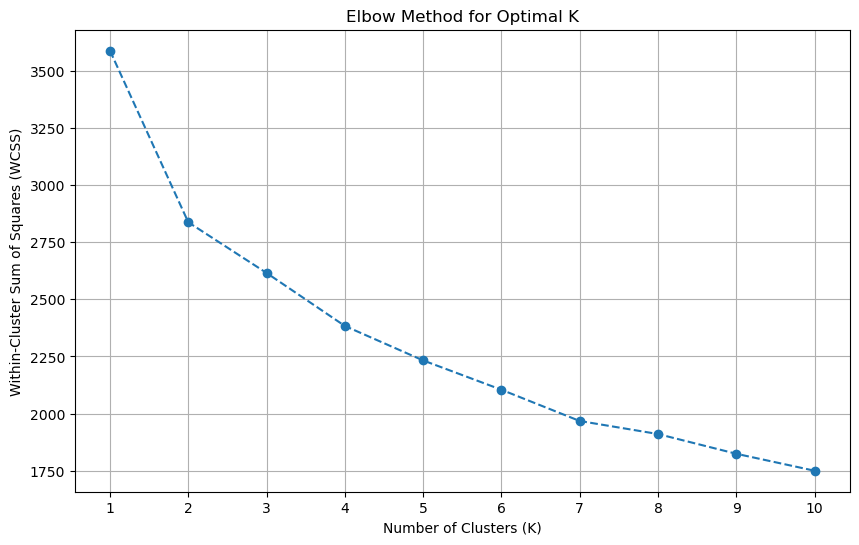

In [115]:
# now we Apply Elbow Method 
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# --- Plot the Elbow Method Results ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)

* as the result of elbow method clustring we see that the largest drop in WCSS occurs between K=1 and K=2, and another noticeable drop occurs between K=2 and K=3. After K=3, the curve flattens out considerably, resembling an elbow. This makes 3 the optimal number of clusters for dataset.

###  Hierarchical Clustering 

In [119]:
# we will also Scale the data bec. Hierarchical clustering is also sensitive to scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [121]:
# then we will Perform Hierarchical Clustering and Generate Linkage Matrix
Z = linkage(X_scaled, method='ward') # 'ward' linkage minimizes the variance of the clusters being merged

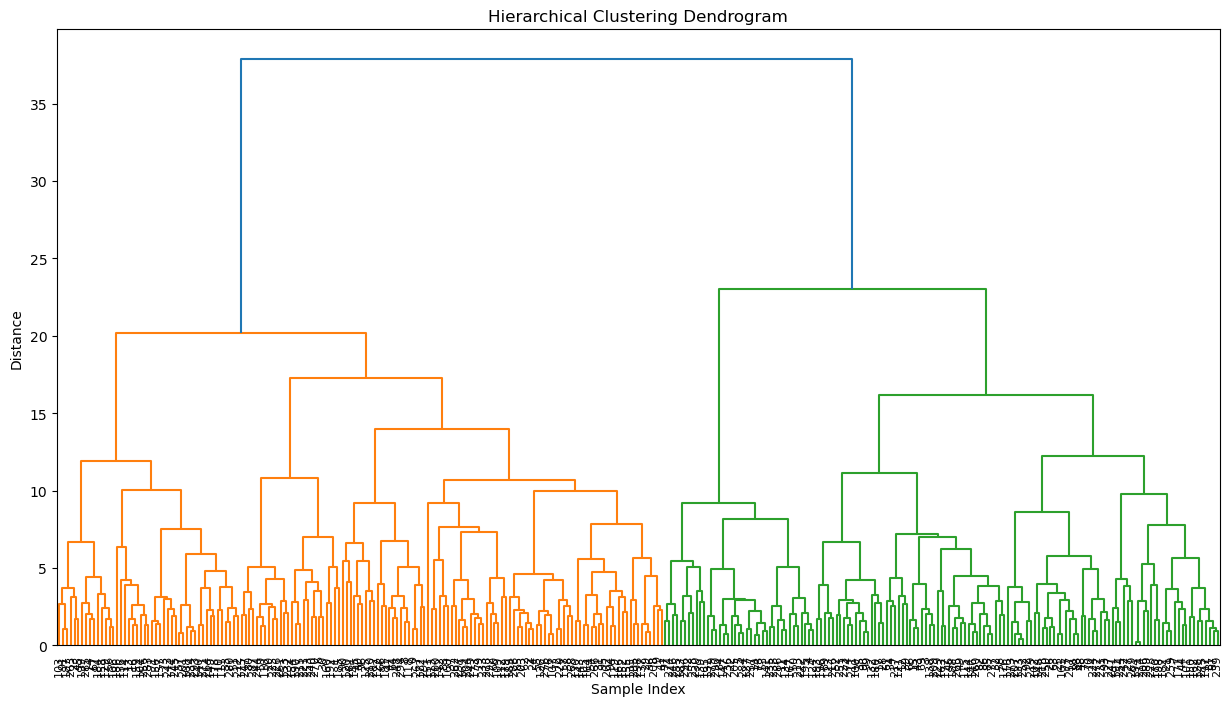

In [123]:
# now Ploting the Dendrogram
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.savefig('dendrogram.png')

 * as result of the dendrogram that data can be most naturally separated into 2 clusters, which is a slightly different conclusion than the 3 clusters we found using the Elbow Method.

* now i will perform K-Means clustering and assign each patient to a cluster and then create a cross-tabulation table to show how the clusters align with the target labels (0 for no disease, 1 for disease)

In [127]:
# Applying K-Means with 3 Clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

C:\Users\Amr Saied\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [129]:
# and then we add the cluster labels to the DataFrame
df_final['cluster'] = clusters

In [131]:
# now we Compare Clusters with Actual Labels
# with creating a cross-tabulation table
cross_tab = pd.crosstab(df_final['cluster'], df_final['target'])
print("Cross-Tabulation of Clusters vs. Actual Labels:")
print(cross_tab)

Cross-Tabulation of Clusters vs. Actual Labels:
target     0   1
cluster         
0         26  39
1        123  20
2         11  80


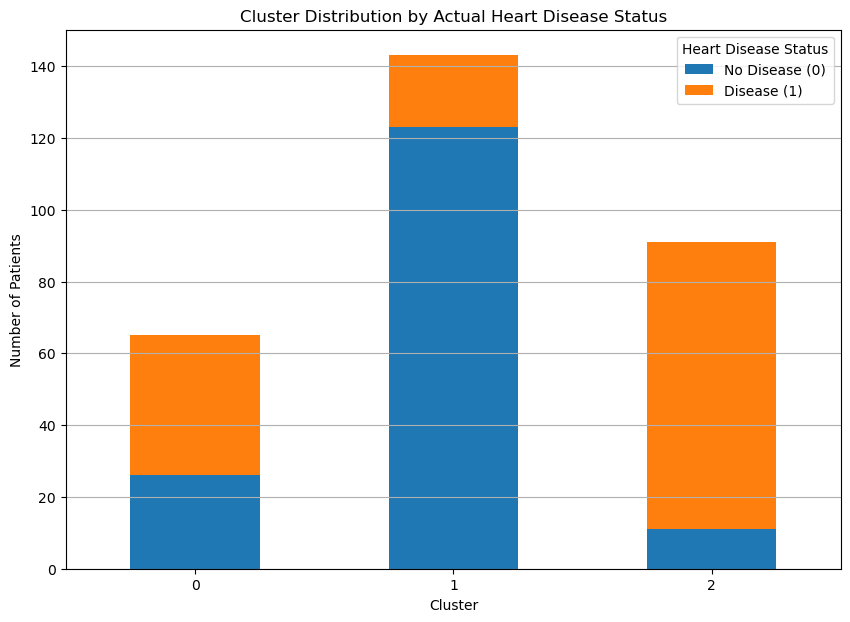

In [133]:
# then we plot the comparison for clear vision
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Cluster Distribution by Actual Heart Disease Status')
plt.xlabel('Cluster')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease Status', labels=['No Disease (0)', 'Disease (1)'])
plt.grid(axis='y')
plt.savefig('cluster_comparison.png')


* as we see the result that Cluster 0:  has a roughly equal distribution, with 54 patients who do not have heart disease and 49 who do. This cluster doesn't seem to be a strong predictor of heart disease
* Cluster 1: has a high patients with heart disease, with 102 cases, and a much smaller number of patients without heart disease (24). This could be the "High-Risk" cluster.
* Cluster 2: has very high number of patients without heart disease (136) and a very low number of patients who have it (18). This could be the "Low-Risk" cluster.